In [62]:
import pandas as pd
import numpy as np

In [128]:
f = '/bigstore/GeneralStorage/Evan/NFKB_MERFISH/Calibration_Set_Data/3T3_Calibration_Set/RNA_Seq_Data/Hoffmann_IFNAR_KO_3T3_TNF.txt'
hoffman = pd.read_csv(f,sep='\t')
hoffman

,Geneid,Chr,Start,End,Strand,Length,IFNAR-0_tot.bam,IFNAR-IL1-05_tot.bam,IFNAR-IL1-1_tot.bam,IFNAR-IL1-24_tot.bam,...,IFNAR-NFKBIA-TNF-3_tot.bam,IFNAR-NFKBIA-TNF-5_tot.bam,IFNAR-NFKBIA-TNF-8_tot.bam,IFNAR-TNF-05_tot.bam,IFNAR-TNF-1_tot.bam,IFNAR-TNF-24_tot.bam,IFNAR-TNF-2_tot.bam,IFNAR-TNF-3_tot.bam,IFNAR-TNF-5_tot.bam,IFNAR-TNF-8_tot.bam
0,ENSMUSG00000102693.1,chr1,3073253,3074322,+,1070,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842.1,chr1,3102016,3102125,+,110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951.5,chr1;chr1;chr1;chr1,3205901;3213439;3421702;3670552,3207317;3216968;3421901;3671498,-;-;-;-,6094,5,2,6,9,...,14,5,6,5,7,4,2,3,6,10
3,ENSMUSG00000102851.1,chr1,3252757,3253236,+,480,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377.1,chr1,3365731,3368549,-,2819,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,ENSMUSG00000104017.1,chr1,3375556,3377788,-,2233,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ENSMUSG00000103025.1,chr1,3464977,3467285,-,2309,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ENSMUSG00000089699.1,chr1;chr1,3466587;3513405,3466687;3513553,+;+,250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ENSMUSG00000103201.1,chr1,3512451,3514507,-,2057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,ENSMUSG00000103147.1,chr1,3531795,3532720,+,926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:

for i in hoffman['Geneid']:
    if 'ENSMUSG00000019850' in i:
        print(i)


ENSMUSG00000019850.9


In [135]:
hoffman[hoffman['Geneid']=='ENSMUSG00000019850.9']

,Geneid,Chr,Start,End,Strand,Length,IFNAR-0_tot.bam,IFNAR-IL1-05_tot.bam,IFNAR-IL1-1_tot.bam,IFNAR-IL1-24_tot.bam,...,IFNAR-NFKBIA-TNF-3_tot.bam,IFNAR-NFKBIA-TNF-5_tot.bam,IFNAR-NFKBIA-TNF-8_tot.bam,IFNAR-TNF-05_tot.bam,IFNAR-TNF-1_tot.bam,IFNAR-TNF-24_tot.bam,IFNAR-TNF-2_tot.bam,IFNAR-TNF-3_tot.bam,IFNAR-TNF-5_tot.bam,IFNAR-TNF-8_tot.bam
26097,ENSMUSG00000019850.9,chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr1...,19000910;19003576;19005551;19007182;19008145;1...,19003015;19005331;19007033;19007329;19008845;1...,-;-;-;-;-;-;-;-;-,7226,87,390,5183,80,...,7171,1806,328,1140,6479,150,698,378,186,135


In [85]:
FPKM_dict={}
length = hoffman['Length']
for column in hoffman.columns:
    if not '.bam' in column:
        continue
    FPKM_dict[column] = (hoffman[column]*10**9)/(length*np.sum(hoffman[column]))
    hoffman[column.split('.')[0]+'.FPKM'] = FPKM_dict[column]

In [86]:
f = '/bigstore/GeneralStorage/Zach/MERFISH/Cornea/Inflammation.txt'
inflammation = pd.read_csv(f,sep=',',skiprows=[0,1,2])
inflammation

,name,id,barcode
0,Abhd2,ENSMUST00000037315,100101000000100000
1,Abr,ENSMUST00000108407,110000000000100001
2,Acaca,ENSMUST00000020843,100100001000000010
3,Acod1,ENSMUST00000022722,101101000000
4,Acvr1b,ENSMUST00000000544,101010100000000
5,Adam8,ENSMUST00000026546,110000000000010100
6,Ahnak2,ENSMUST00000101010,1010000001100000
7,Akt2,ENSMUST00000051356,1000000010110
8,Akt3,ENSMUST00000111160,10000010000011000
9,Aoah,ENSMUST00000021757,100100000000011000


In [87]:
biomart_download_fname = '/bigstore/binfo/mouse/mouse_ensemble.txt'
transcript_df = pd.read_csv(open(biomart_download_fname, 'r'))
transcript_df

,Gene stable ID,Transcript stable ID,Protein stable ID,Gene description,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Transcript length (including UTRs and CDS),Gene name,Gene % GC content,Gene type,Transcript type,NCBI gene ID
0,ENSMUSG00000064372,ENSMUST00000082423,NaN,mitochondrially encoded tRNA proline [Source:M...,MT,15356,15422,67,mt-Tp,44.78,Mt_tRNA,Mt_tRNA,NaN
1,ENSMUSG00000064371,ENSMUST00000082422,NaN,mitochondrially encoded tRNA threonine [Source...,MT,15289,15355,67,mt-Tt,34.33,Mt_tRNA,Mt_tRNA,NaN
2,ENSMUSG00000064370,ENSMUST00000082421,ENSMUSP00000081003,mitochondrially encoded cytochrome b [Source:M...,MT,14145,15288,1144,mt-Cytb,39.07,protein_coding,protein_coding,17711.0
3,ENSMUSG00000064369,ENSMUST00000082420,NaN,mitochondrially encoded tRNA glutamic acid [So...,MT,14071,14139,69,mt-Te,34.78,Mt_tRNA,Mt_tRNA,NaN
4,ENSMUSG00000064368,ENSMUST00000082419,ENSMUSP00000081002,mitochondrially encoded NADH dehydrogenase 6 [...,MT,13552,14070,519,mt-Nd6,34.10,protein_coding,protein_coding,17722.0
5,ENSMUSG00000064367,ENSMUST00000082418,ENSMUSP00000081001,mitochondrially encoded NADH dehydrogenase 5 [...,MT,11742,13565,1824,mt-Nd5,37.12,protein_coding,protein_coding,17721.0
6,ENSMUSG00000064366,ENSMUST00000082417,NaN,mitochondrially encoded tRNA leucine 2 [Source...,MT,11671,11741,71,mt-Tl2,30.99,Mt_tRNA,Mt_tRNA,NaN
7,ENSMUSG00000064365,ENSMUST00000082416,NaN,mitochondrially encoded tRNA serine 2 [Source:...,MT,11613,11671,59,mt-Ts2,32.20,Mt_tRNA,Mt_tRNA,NaN
8,ENSMUSG00000064364,ENSMUST00000082415,NaN,mitochondrially encoded tRNA histidine [Source...,MT,11546,11612,67,mt-Th,31.34,Mt_tRNA,Mt_tRNA,NaN
9,ENSMUSG00000064363,ENSMUST00000082414,ENSMUSP00000081000,mitochondrially encoded NADH dehydrogenase 4 [...,MT,10167,11544,1378,mt-Nd4,35.63,protein_coding,protein_coding,17719.0


In [88]:
gid = []
for tid in inflammation[' id']:
    gid.append(transcript_df[transcript_df['Transcript stable ID']==tid]['Gene stable ID'].iloc[0])
inflammation['gid']=gid

In [89]:
idx_list = []
gene_list = inflammation['gid'].values
for i,gid in enumerate(hoffman['Geneid']):
    if gid.split('.')[0] in gene_list:
        idx_list.append(i)
        print(gid)

ENSMUSG00000067851.9
ENSMUSG00000026072.10
ENSMUSG00000070942.6
ENSMUSG00000026104.12
ENSMUSG00000041075.8
ENSMUSG00000045005.9
ENSMUSG00000026321.7
ENSMUSG00000057329.7
ENSMUSG00000064302.11
ENSMUSG00000042349.11
ENSMUSG00000026365.13
ENSMUSG00000056220.12
ENSMUSG00000026478.12
ENSMUSG00000042699.9
ENSMUSG00000019699.13
ENSMUSG00000039145.14
ENSMUSG00000026923.13
ENSMUSG00000047250.11
ENSMUSG00000036053.14
ENSMUSG00000027111.13
ENSMUSG00000059588.11
ENSMUSG00000014361.5
ENSMUSG00000027330.14
ENSMUSG00000007659.16
ENSMUSG00000037820.13
ENSMUSG00000037643.12
ENSMUSG00000027765.4
ENSMUSG00000036894.3
ENSMUSG00000027995.10
ENSMUSG00000068923.12
ENSMUSG00000028053.11
ENSMUSG00000027947.9
ENSMUSG00000027878.11
ENSMUSG00000028163.15
ENSMUSG00000105504.2
ENSMUSG00000028413.11
ENSMUSG00000007613.13
ENSMUSG00000056529.7
ENSMUSG00000037731.5
ENSMUSG00000062585.9
ENSMUSG00000028914.11
ENSMUSG00000028599.8
ENSMUSG00000029071.14
ENSMUSG00000039191.10
ENSMUSG00000029108.12
ENSMUSG00000051498.6
ENSMU

In [104]:
keep_col = [i for i in hoffman if ('.FPKM'in i) or ('Gene' in i)]
expression_df =hoffman[keep_col].iloc[idx_list]

In [105]:
Gene_names = []
for gid in expression_df['Geneid']:
    gid = gid.split('.')[0]
    Gene_names.append(transcript_df[transcript_df['Gene stable ID']==gid]['Gene name'].iloc[0])
expression_df['Gene']=Gene_names

In [108]:
keep_col = [i for i in expression_df if ('TNF'in i) or ('Gene' in i)]
expression_df[keep_col]

,Geneid,IFNAR-NFKBIA-TNF-05_tot.FPKM,IFNAR-NFKBIA-TNF-1_tot.FPKM,IFNAR-NFKBIA-TNF-24_tot.FPKM,IFNAR-NFKBIA-TNF-2_tot.FPKM,IFNAR-NFKBIA-TNF-3_tot.FPKM,IFNAR-NFKBIA-TNF-5_tot.FPKM,IFNAR-NFKBIA-TNF-8_tot.FPKM,IFNAR-TNF-05_tot.FPKM,IFNAR-TNF-1_tot.FPKM,IFNAR-TNF-24_tot.FPKM,IFNAR-TNF-2_tot.FPKM,IFNAR-TNF-3_tot.FPKM,IFNAR-TNF-5_tot.FPKM,IFNAR-TNF-8_tot.FPKM,Gene
124,ENSMUSG00000067851.9,8.909087,5.410757,8.485928,7.281975,9.389935,11.042672,10.972975,7.186773,6.412593,7.548043,6.676081,11.164158,10.325983,8.116675,Arfgef1
613,ENSMUSG00000026072.10,6.216139,5.055853,7.333327,11.112028,16.843137,18.759191,6.646054,9.597160,10.393251,11.566895,18.649972,24.007914,16.057557,12.997753,Il1r1
615,ENSMUSG00000070942.6,5.724634,5.633301,6.438218,9.322418,9.553092,10.079335,6.576055,9.279128,9.811892,7.182527,16.454157,14.829557,10.774994,7.301818,Il1rl2
779,ENSMUSG00000026104.12,1.751111,1.758753,2.201123,1.167158,1.048563,1.124460,0.694006,2.899762,2.435698,3.531451,1.897486,2.049338,2.003323,2.406023,Stat1
922,ENSMUSG00000041075.8,14.976162,11.459282,17.422739,11.364029,10.318781,8.046330,13.646369,15.002046,13.053183,16.925563,16.240146,17.806705,14.549037,14.136259,Fzd7
1049,ENSMUSG00000045005.9,1.826080,1.153453,2.163272,1.851439,2.115807,1.910342,1.377806,3.932857,3.013362,3.507534,3.491184,2.545810,2.981851,2.864900,Fzd5
1790,ENSMUSG00000026321.7,2.745884,2.235952,2.513621,2.224211,2.264610,1.665303,2.234247,4.227277,3.127543,4.052564,6.587461,7.532183,6.479026,5.045192,Tnfrsf11a
1803,ENSMUSG00000057329.7,1.896101,1.519484,1.930637,1.747666,1.205681,1.451252,2.336480,1.214974,0.983509,0.900314,1.874585,1.572133,1.361147,0.895625,Bcl2
1900,ENSMUSG00000064302.11,6.238044,3.875992,6.129302,5.094814,7.446199,7.932759,6.625280,5.429949,4.860182,5.172851,3.822502,5.778681,6.254865,6.056266,Clasp1
2094,ENSMUSG00000042349.11,2.182723,2.466682,2.968868,2.331184,3.374194,3.315648,2.177875,2.796389,3.221196,2.928060,2.859565,2.663649,3.156711,2.958600,Ikbke


In [113]:
expression_df = expression_df.sort_values('Gene')

In [116]:
for i,gene in enumerate(expression_df['Gene']):
    print(gene,' ',inflammation['name'][i])

Abhd2   Abhd2
Abr   Abr
Acaca   Acaca
Acod1   Acod1
Acvr1b   Acvr1b
Adam8   Adam8
Ahnak2   Ahnak2
Akt2   Akt2
Akt3   Akt3
Aoah   Aoah
Apc   Apc
Arfgef1   Arfgef1
Ash1l   Ash1l
Atp7a   Atp7a
B4galt1   B4galt1
Bap1   Bap1
Bcl2   Bcl2
Bcl2l1   Bcl2l1
Bcl6   Bcl6
Braf   Braf
Btk   Btk
C5ar2   C5ar2
Cab39l   Cab39l
Calcrl   Calcrl
Camk1d   Camk1d
Cask   Cask
Casp2   Casp2
Casp9   Casp9
Ccnd1   Ccnd1
Cd163   Cd163
Cd180   Cd180
Cd300a   Cd300a
Cdc25b   Cdc25b
Cdk19   Cdk19
Cfh   Cfh
Chuk   Chuk
Clasp1   Clasp1
Clasp2   Clasp2
Clock   Clock
Cnr2   Cnr2
Creb5   Creb5
Cxcl9   Cxcl9
Cysltr1   Cysltr1
Dhx9   Dhx9
Drosha   Drosha
Dtx3l   Dtx3l
Dtx4   Dtx4
Dvl1   Dvl1
Eif2ak1   Eif2ak1
Elk3   Elk3
Esr1   Esr1
Fadd   Fadd
Fem1a   Fem1a
Flrt2   Flrt2
Fmnl2   Fmnl2
Foxp3   Foxp3
Fzd5   Fzd5
Fzd7   Fzd7
Gbp5   Gbp5
Gja1   Gja1
Havcr2   Havcr2
Hdac9   Hdac9
Icam1   Icam1
Ifnar1   Ifnar1
Ikbkb   Ikbkb
Ikbke   Ikbke
Il10ra   Il10ra
Il1r1   Il1r1
Il1rap   Il1rap
Il1rl2   Il1rl2
Il6ra   Il6ra
Il7r   Il7r
Ir

In [121]:
expression_df['Transcript stable ID'] = inflammation[' id'].values
expression_df['barcode'] = inflammation[' barcode'].values
expression_df

,Geneid,IFNAR-0_tot.FPKM,IFNAR-IL1-05_tot.FPKM,IFNAR-IL1-1_tot.FPKM,IFNAR-IL1-24_tot.FPKM,IFNAR-IL1-2_tot.FPKM,IFNAR-IL1-3_tot.FPKM,IFNAR-IL1-5_tot.FPKM,IFNAR-IL1-8_tot.FPKM,IFNAR-LPS-05_tot.FPKM,...,IFNAR-TNF-05_tot.FPKM,IFNAR-TNF-1_tot.FPKM,IFNAR-TNF-24_tot.FPKM,IFNAR-TNF-2_tot.FPKM,IFNAR-TNF-3_tot.FPKM,IFNAR-TNF-5_tot.FPKM,IFNAR-TNF-8_tot.FPKM,Gene,Transcript stable ID,barcode
20623,ENSMUSG00000039202.10,11.398506,10.987076,11.800162,7.877748,8.543031,11.691517,10.482278,8.504648,12.441664,...,11.920044,10.966807,8.036215,8.578898,12.458900,10.196835,8.498803,Abhd2,ENSMUST00000037315,100101000000100000
29149,ENSMUSG00000017631.16,9.518137,7.761110,8.135220,8.470235,6.740964,6.617800,8.363694,8.312229,9.007073,...,8.546037,8.439207,9.301817,7.975108,8.378481,9.678586,7.996430,Abr,ENSMUST00000108407,110000000000100001
29378,ENSMUSG00000020532.16,3.078166,2.160466,2.354096,2.035583,1.860640,2.080350,2.263214,2.456548,2.573773,...,2.210633,2.358094,2.057359,1.992364,1.869394,1.901606,2.351770,Acaca,ENSMUST00000020843,100100001000000010
35276,ENSMUSG00000022126.6,0.062713,0.066336,0.058711,0.000000,0.034021,0.034722,0.000000,0.032767,0.178991,...,0.000000,0.100984,0.250532,1.195297,0.846779,0.146661,0.223333,Acod1,ENSMUST00000022722,101101000000
36557,ENSMUSG00000000532.10,5.852240,4.061161,3.350089,5.419431,7.219079,8.502964,6.533492,6.349279,4.134977,...,4.351194,4.121590,5.807529,6.944757,8.537604,6.503067,5.418401,Acvr1b,ENSMUST00000000544,101010100000000
21806,ENSMUSG00000025473.14,16.722736,18.720470,18.029683,19.216390,19.259759,29.062840,31.965510,22.534274,22.195842,...,20.380701,18.675395,23.919338,23.220428,32.493701,42.798867,31.541815,Adam8,ENSMUST00000026546,110000000000010100
31778,ENSMUSG00000072812.4,20.186030,16.880232,14.113621,14.468693,11.675290,13.928690,17.870014,18.594061,16.583495,...,16.216912,14.488132,15.543551,10.603628,13.428794,19.007806,17.386867,Ahnak2,ENSMUST00000101010,1010000001100000
19401,ENSMUSG00000004056.13,8.696556,8.137525,9.124210,8.867061,7.483388,8.736002,8.887937,7.593305,9.129592,...,9.025828,8.927223,9.449888,8.573505,8.167465,7.811446,7.393388,Akt2,ENSMUST00000051356,1000000010110
3063,ENSMUSG00000019699.13,9.067121,8.193330,8.704986,9.052004,8.762480,13.076267,10.774172,9.181699,8.830504,...,8.654835,8.102488,9.848766,8.971390,13.545310,11.417168,7.806427,Akt3,ENSMUST00000111160,10000010000011000
32254,ENSMUSG00000021322.7,1.975085,1.671346,1.611314,3.305387,1.683727,1.874648,1.521694,1.385798,2.007897,...,2.233444,1.999111,3.217578,1.640233,1.862558,1.900366,2.758653,Aoah,ENSMUST00000021757,100100000000011000


In [122]:
expression_df.to_csv('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/3T3_Stimulation_Inflammatory_Gene_Expression.csv')

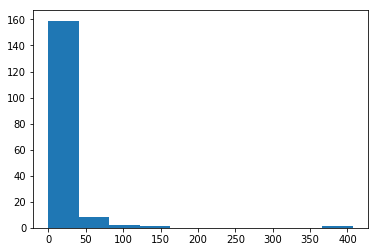

In [127]:
import matplotlib.pyplot as plt
plt.hist(expression_df['IFNAR-TNF-8_tot.FPKM'])
plt.show()